<a href="https://colab.research.google.com/github/Binaryninja45/Data-Science-Salary/blob/main/Data_Sci_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv("/content/ds_salaries.csv")
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
salary.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [4]:
salary.shape #The dataset has 3755 rows and 11 columns

(3755, 11)

In [5]:
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


* The dataset has 4 int dtypes and rest are object dtypes

In [7]:
salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [8]:
salary.describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.0,3755.0,3755.0,3755.0
mean,2022.0,190696.0,137570.0,46.0
std,1.0,671677.0,63056.0,49.0
min,2020.0,6000.0,5132.0,0.0
25%,2022.0,100000.0,95000.0,0.0
50%,2022.0,138000.0,135000.0,0.0
75%,2023.0,180000.0,175000.0,100.0
max,2023.0,30400000.0,450000.0,100.0


### Observation:
* I came to the conclusion that min salary is 6000 and the max salary is 30400k.
* Also the min salary in USD is 5132 and the max is 450k.
* Where the remote ratio is 100%

In [9]:
salary.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


<Axes: >

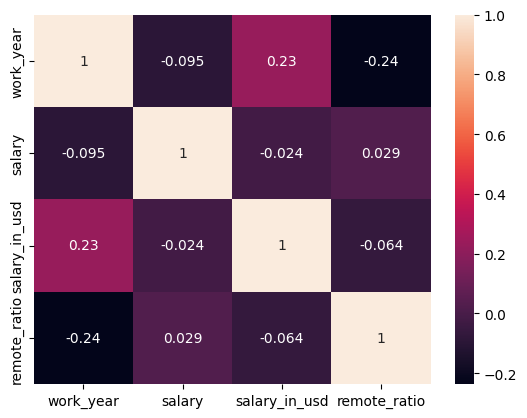

In [10]:
cm = salary.corr()
sns.heatmap(cm, annot=True)

### Observation
* For the heatmap we can see that the correlation between the features are not too strong. for example -
* "work_year" and "salary_in_usd" have a positive relationship (0.23), which might mean that as the number of work years increases, the salary in US dollars tends to increase a little bit, but not much.
* "work_year" and "remote_ratio" have a negative relationship (-0.24), suggesting that people with more work years might not work remotely as much

In [11]:
salary['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [12]:
salary['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [13]:
salary['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

Text(0.5, 1.0, 'Distribution of Experience level')

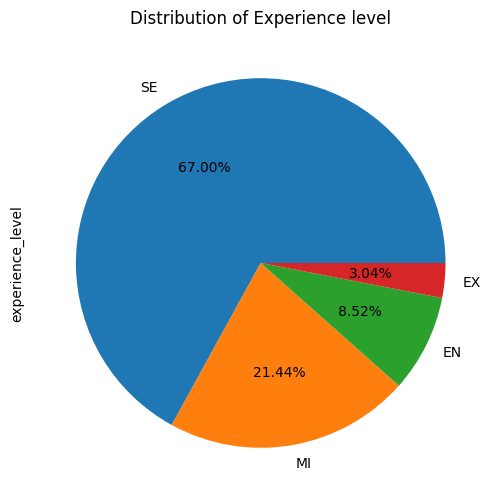

In [14]:
plt.figure(figsize = (12,6))
salary['experience_level'].value_counts().plot(kind='pie', autopct = '%.2f%%')
plt.title('Distribution of Experience level')

### Observation:
* There are total 4 exp levels which are SE, MI, EN, EX.
* From the pie chart we can see that almost 67% people comes under SE category and the second larest category with 21% in MI followed by EN and EX.

<Axes: xlabel='employment_type', ylabel='Count'>

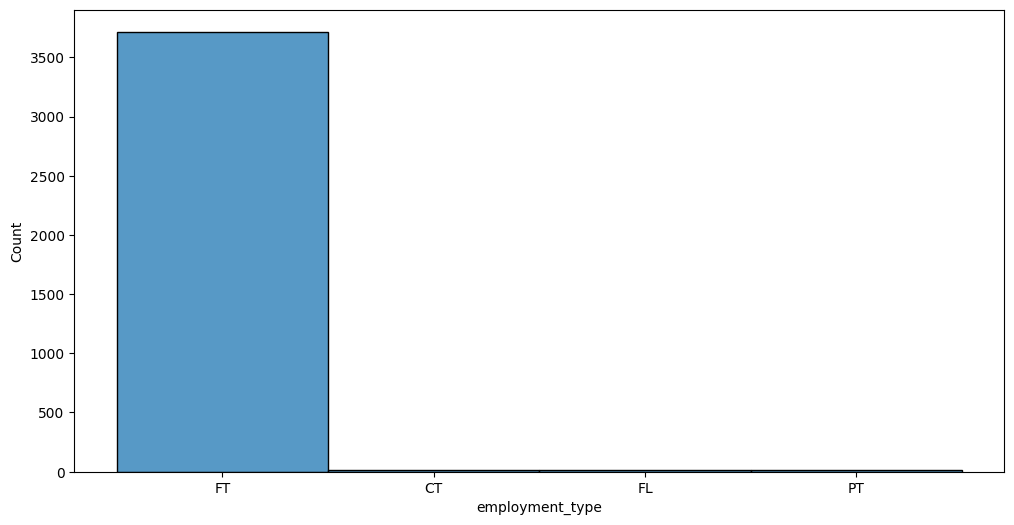

In [15]:
plt.figure(figsize = (12, 6))
sns.histplot(data=salary['employment_type'])

### Observation:
* From the graph we can see that there is no clear overview, but we can see the count of employee working FT is 3500+ where othere are not clearly visible.

In [16]:
salary['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Top 10 jobs')

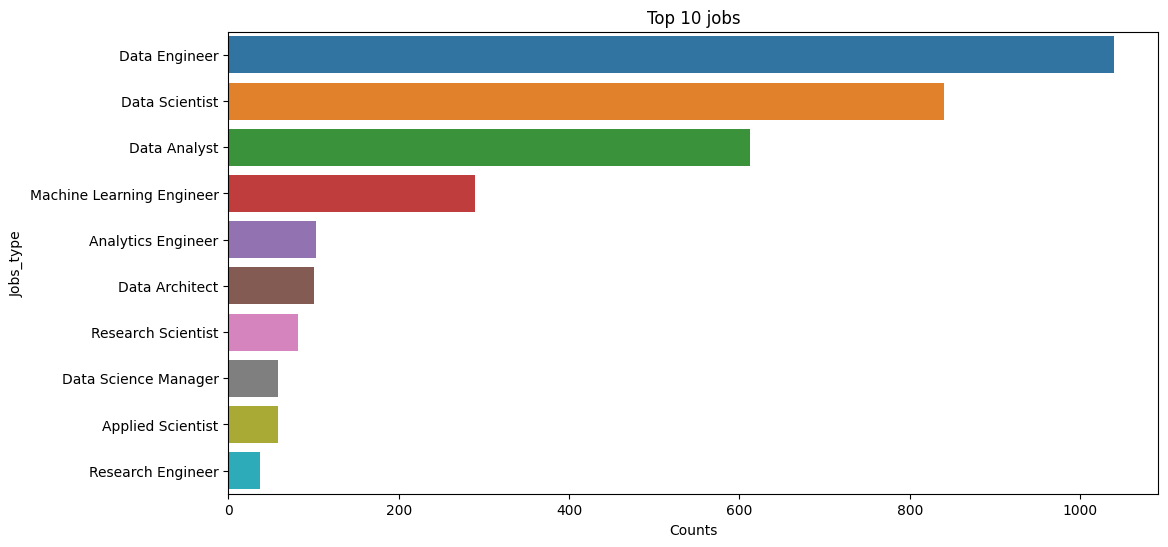

In [17]:
plt.figure(figsize= (12,6))

top_jobs = salary['job_title'].value_counts().nlargest(10)
sns.barplot(x= top_jobs, y = top_jobs.index)

plt.xlabel('Counts')
plt.ylabel('Jobs_type')
plt.title('Top 10 jobs')

### Observation:
* from the graph we can see that the Data Engineer jobs are over 1000, secondly Data Scientist by around 800, followed by Data Analyst and Machine learning with 600 and 250.

Text(0.5, 1.0, 'Distribution of work years')

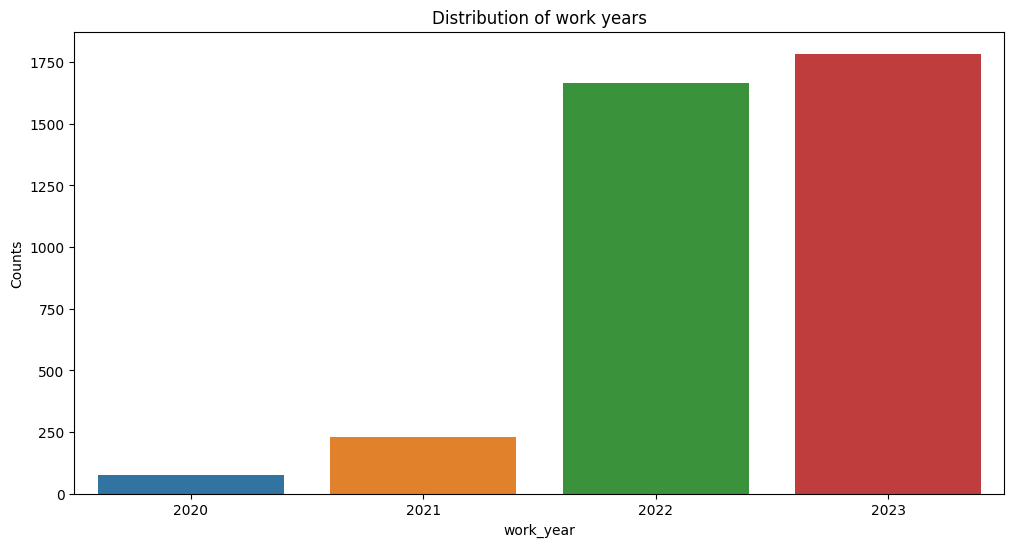

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data = salary, x = 'work_year')
plt.xlabel('work_year')
plt.ylabel('Counts')
plt.title('Distribution of work years')

### Observation:
* From the graph we can see that before 2020 the data science roles was not so famous but we can see the from the trend that after 2020 to 2023 it got famous.

Text(0.5, 1.0, 'Distributions of salary in USD')

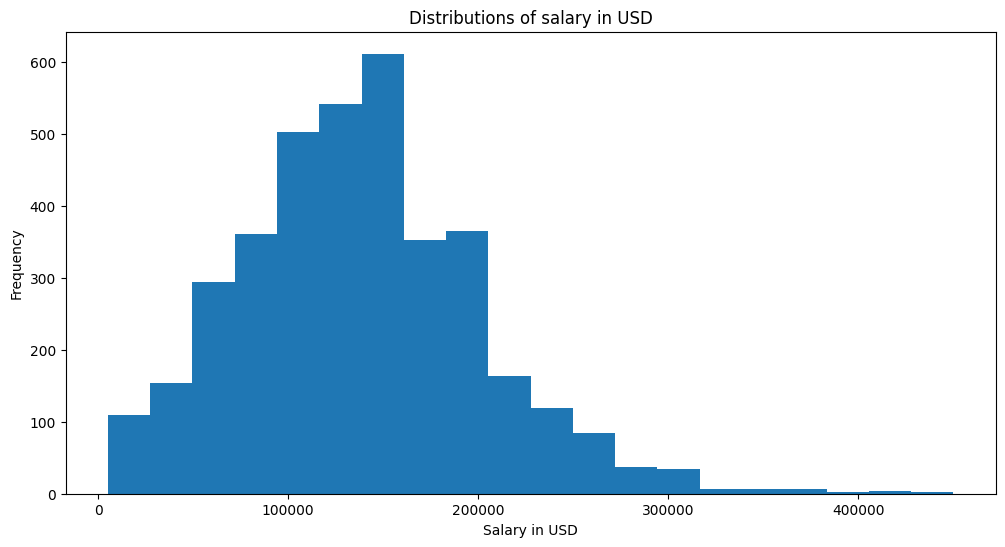

In [19]:
plt.figure(figsize = (12,6))
plt.hist(salary['salary_in_usd'], bins=20)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distributions of salary in USD')

In [20]:
salary['salary_in_usd'].mean()

137570.38988015978

In [21]:
salary['salary_in_usd'].max()

450000

### Observation:
* From the histogram we can see that over 600 people are getting __137570USD__ average salary, while the maximum salary is __450000USD__

In [22]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Text(0.5, 1.0, 'Distribution of Remote Ratio')

<Figure size 1600x800 with 0 Axes>

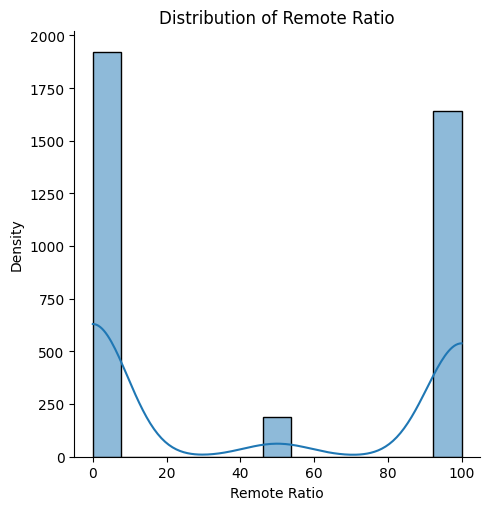

In [23]:
plt.figure(figsize=(16,8))
sns.displot(salary['remote_ratio'], kde = True)
plt.xlabel('Remote Ratio')
plt.ylabel('Density')
plt.title('Distribution of Remote Ratio')

In [24]:
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of salary by year')

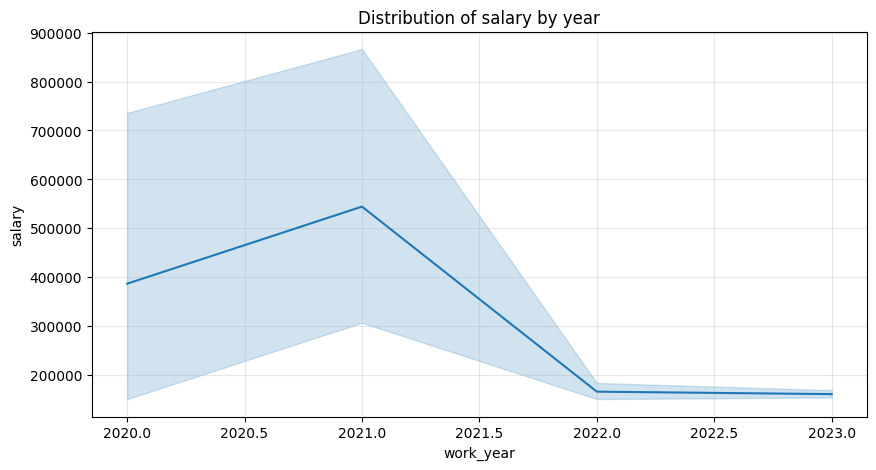

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=salary, y='salary', x='work_year')
plt.grid(alpha = 0.3)
plt.title('Distribution of salary by year')

### Observation:
* From the line graph we can see that there was slightly increase in Job salary(INR) till 2021 but after 2021 we saw sharply declined which was less than __200000INR__ and this was followed till 2023

Text(0.5, 1.0, 'Top 5 employee residence')

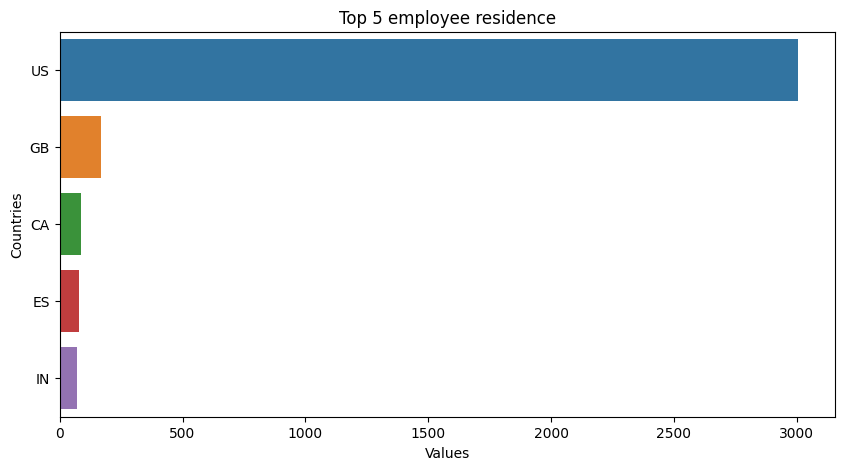

In [26]:
plt.figure(figsize = (10, 5))

top_jobs = salary['employee_residence'].value_counts().nlargest(5)
sns.barplot(x = top_jobs, y = top_jobs.index)

plt.xlabel('Values')
plt.ylabel('Countries')
plt.title('Top 5 employee residence')

### Observation:
* Employee working as data science or related role has almost 3000 employees from US.

In [27]:
salary['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

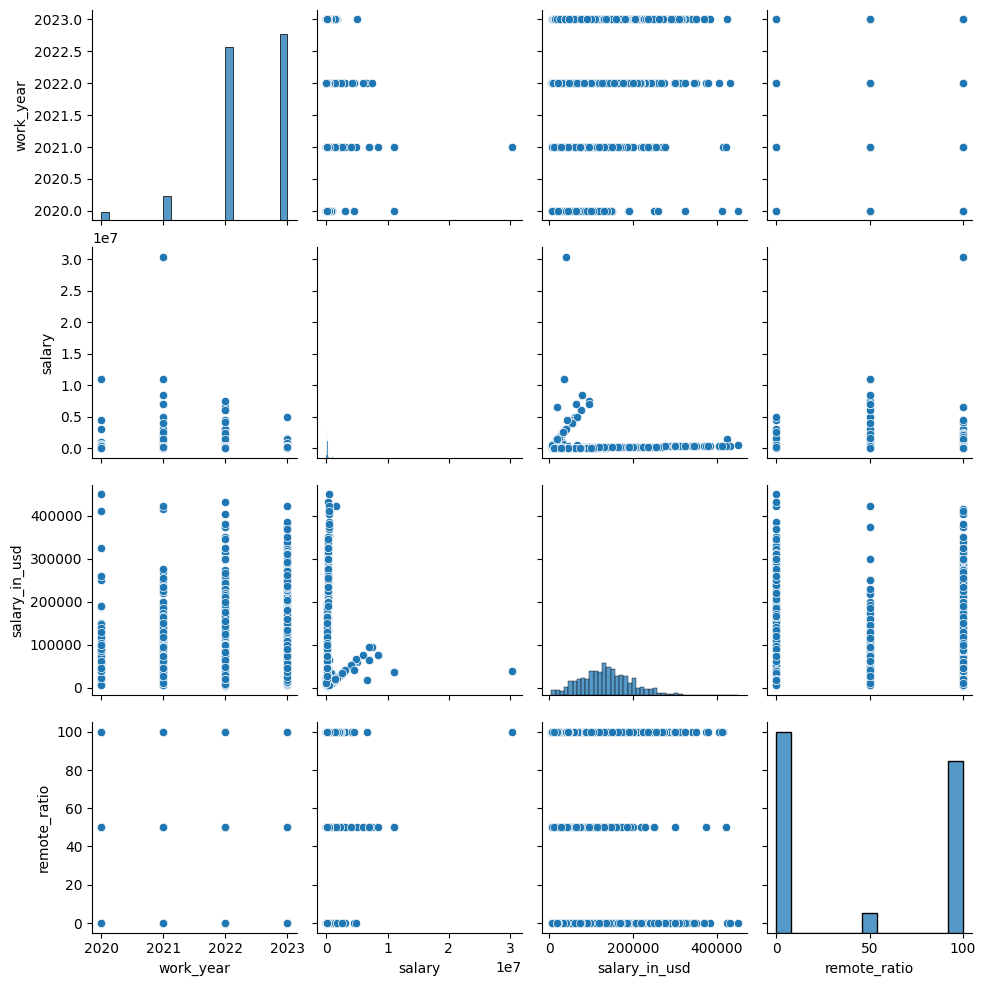

In [28]:
  sns.pairplot(salary)

Text(0, 0.5, 'Count')

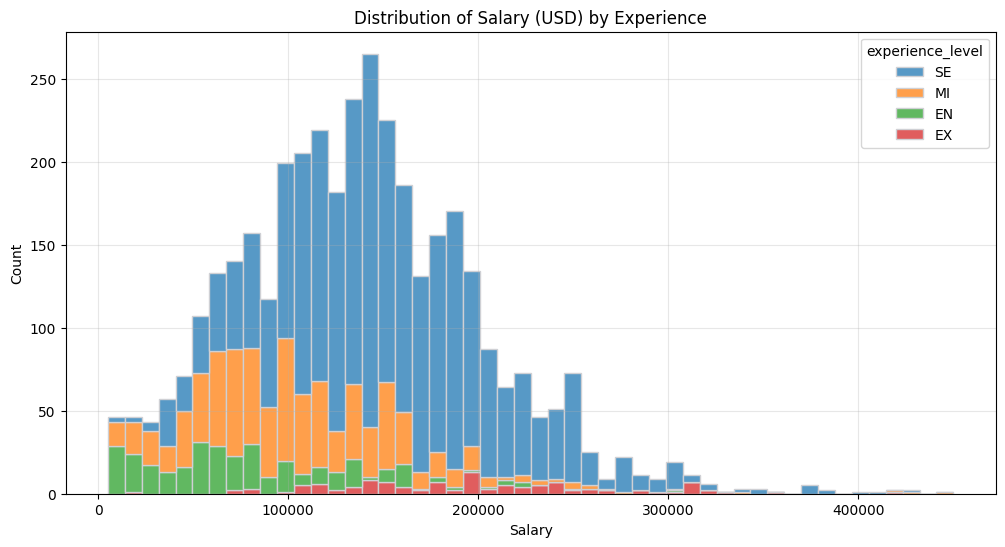

In [29]:
plt.figure(figsize = (12, 6))

sns.histplot(x = 'salary_in_usd', hue = 'experience_level', multiple = 'stack',
             edgecolor = '#cfd0d4', bins = 50, data = salary)


plt.grid(alpha = 0.3)
plt.title('Distribution of Salary (USD) by Experience')
plt.xlabel('Salary')
plt.ylabel('Count')

### Observation:
* We can conclude that employee who are senior __SE__, are paid the higest salary.

<Figure size 1200x600 with 0 Axes>

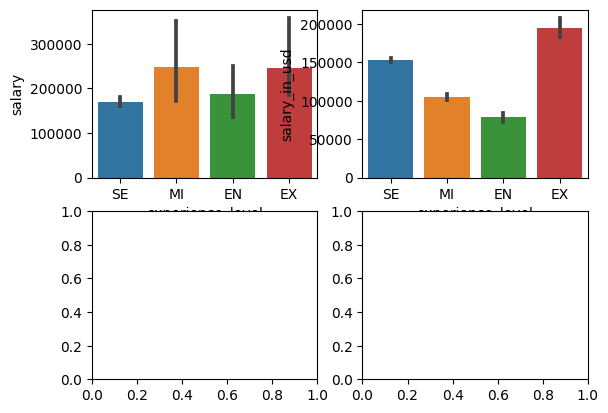

In [30]:
plt.figure(figsize = (12, 6))
fig, axes = plt.subplots(2, 2)
sns.barplot(data=salary, x='experience_level', y='salary', ax=axes[0,0])
sns.barplot(data=salary, x='experience_level', y='salary_in_usd', ax=axes[0,1])
plt.show()

### Observation:
* We can see that employee having 'EX' as exp are getting higest paid in USD

# Summary:

Throughout this project, I delved into the dataset with exploratory analysis, uncovering crucial insights and getting to know the nuances of the data I was working with. I identified areas where information was missing and unearthed potential connections between different variables. By utilizing a range of visual tools, I was able to present the data in a way that was not only meaningful but also made my observations and conclusions much clearer to communicate.





